In [3]:
import pandas as pd

df_sleep = pd.read_csv("data/msleep.csv")
df_sleep

ERROR! Session/line number was not unique in database. History logging moved to new session 13


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [ ]:
# **p-değeri (p-value)**
# p-değeri, bir istatistiksel hipotezin rastgele bir örneklemden elde edilen verilere dayanarak doğruluğunun değerlendirilmesi için kullanılan bir metriktir. Bu değer, gözlemlenen ya da daha aşırı sonuçların, null hipotezi (H0) doğru olduğu durumda rastgele bir şans sonucu olarak elde edilme olasılığını ifade eder. Genellikle, p-değerinin küçük olması (p < 0.05 gibi), gözlemlediğimiz sonuçların null hipotezi altında rastgele bir şans sonucu olma ihtimalinin düşük olduğunu gösterir ve bu durumda null hipotezi reddedilir.

# **Null Hipotezi (H0)**
# Null hipotezi, genellikle iki grup arasında bir fark olmadığı veya bir tedavinin etkisiz olduğu gibi durumları ifade eden başlangıç varsayımıdır. 
# H0 olarak gösterilir ve istatistiksel testlerde, bu hipotezin doğru olup olmadığını test ederiz. Null hipotezi, genellikle araştırma hipotezi
# veya alternatif hipotezi (Ha veya H1) ile karşılaştırılır.

# **Hipotez Testinin Sonucu**
# - **p < 0.05**: Eğer p-değeri 0.05'ten küçükse, bu, elde edilen sonucun null hipotezi altında rastgele bir şans sonucu olarak ortaya çıkma ihtimalinin %5'ten daha düşük olduğunu gösterir. Bu durumda, null hipotezi red (reddedilir) edilir ve alternatif hipotezin (araştırma hipotezi) desteklendiği sonucuna varılır. Bu, genellikle istatistiksel olarak anlamlı olarak tanımlanır.
# - **p > 0.05**: Eğer p-değeri 0.05'ten büyükse, elde edilen sonuçların null hipotezi altında rastgele bir şans sonucu olarak ortaya çıkma ihtimali %5 veya daha yüksektir. Bu durumda, null hipotezi kabul edilir, yani yeterli kanıt olmadığı için null hipotezi reddedilemez.

# Bu, genellikle bir çalışmada kullanılan standart bir eşik değerdir, ancak bazı durumlarda daha düşük veya daha yüksek p-değer eşikleri
# kullanılabilir, bu tamamen araştırmanın bağlamına ve önemine bağlıdır. Örneğin, daha kritik tıbbi veya farmakolojik araştırmalarda daha 
#düşük bir p-değer eşik değeri kullanılabilir.

In [ ]:
#significance level (anlamlılık leveli) (alpha) H0 hipotezini daha az yanlışlıkla red edebilmek için iki fonksiyonun kesişim alanıdır.

# Anlamlılık düzeyi (significance level), istatistiksel testlerde sıklıkla karşılaştığımız ve genellikle alpha (\(\alpha\)) ile sembolize edilen bir kavramdır. Anlamlılık düzeyi, istatistiksel bir test sırasında null hipotezi \(H_0\) yanlışlıkla reddetme ihtimalini sınırlamak için kullanılır. Bu değer, bir hipotezin test edilmesi sırasında belirlenen ve kabul edilebilir hata sınırını ifade eder.

### Anlamlılık Düzeyi 
# Anlamlılık düzeyi, genellikle %5 (0.05) olarak belirlenir ama bu oran araştırmanın gereksinimlerine göre daha düşük ya da yüksek olabilir. 
#Örneğin, çok kritik kararlar gerektiren tıbbi veya farmakolojik çalışmalarda \(\alpha\) değeri daha düşük, örneğin %1 (0.01) olarak ayarlanabilir. 
# Bu oran, bir hipotezi reddetmede yapılabilecek maksimum Type I hata oranını belirtir.

### Type I Hata (Birinci Tür Hata)
# Type I hata, gerçekte \(H_0\) doğru olduğu halde yanlışlıkla reddedilmesi durumudur. Yani, aslında geçerli olan null hipotezi, verilerde 
# rastlantısal varyasyonlar nedeniyle yanlışlıkla reddedilir. anlamlılık değeri, bu hatanın olasılığını sınırlandırmak için kullanılır.

### İki Fonksiyonun Kesişim Alanı
# İki fonksiyonun kesişim alanı ifadesi, genellikle iki olasılık yoğunluk fonksiyonu (örneğin, null hipotez altında bir dağılım ve alternatif
#hipotez altında bir dağılım) arasındaki kesişme bölgesini ifade eder. Bu kesişim, her iki hipotezin aynı anda mümkün olduğu durumları ve
#bu durumların olasılıklarını gösterir.

#İstatistiksel testlerde, \(\alpha\) seviyesi, bu iki dağılımın kesişim bölgesini sınırlayan bir eşik değer olarak işlev görür. 
#Eğer test istatistiği bu eşik değerin ötesine geçerse, \(H_0\) reddedilir. Bu, testin belirlenen anlamlılık düzeyinde ne kadar "anlamlı" 
#olduğunu belirler ve bu da sonuçların istatistiksel olarak önemli olup olmadığını gösterir.

# Anlamlılık düzeyi, istatistiksel karar verme sürecinde yanlış pozitif sonuçları kontrol altında tutmak için temel bir araçtır.

In [5]:
df_coffee = pd.read_feather("data/coffee_ratings_full.feather")
df_coffee

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [7]:
#df_coffee[df_coffee["total_cup_points"] == df_coffee["total_cup_points"].max()]
df_coffee.sort_values(by="total_cup_points",ascending=False).iloc[0] #head(1) de olur.seri döner. Seri ile df farkı seri tek kayıt df birden fazla kayıt

total_cup_points                                            90.58
species                                                   Arabica
owner                                                   metad plc
country_of_origin                                        Ethiopia
farm_name                                               metad plc
lot_number                                                   None
mill                                                    metad plc
ico_number                                              2014/2015
company                         metad agricultural developmet plc
altitude                                                1950-2200
region                                               guji-hambela
producer                                                METAD PLC
number_of_bags                                              300.0
bag_weight                                                  60 kg
in_country_partner             METAD Agricultural Development plc
harvest_ye

In [9]:
pts_vs_flavor_pop = df_coffee[["total_cup_points","flavor"]] # bu iki sütunu alarak yeni dataframe döndürür
pts_vs_flavor_pop

,total_cup_points,flavor
0,90.58,8.83
1,89.92,8.67
2,89.75,8.50
3,89.00,8.58
4,88.83,8.50
...,...,...
1333,78.75,7.58
1334,78.08,7.67
1335,77.17,7.33
1336,75.08,6.83


In [11]:
pts_vs_flavor_pop_samp = pts_vs_flavor_pop.sample(10)# replace false o yüzden yerine koymadan seçer. yani hep aynı veri çekilir
pts_vs_flavor_pop_samp

,total_cup_points,flavor
302,83.75,7.92
274,83.83,7.58
1231,78.25,7.50
432,83.25,7.75
812,82.00,7.50
1042,80.75,7.33
499,83.00,7.58
468,83.17,7.50
304,83.75,7.67
749,82.25,7.33


In [13]:
cup_points_samp = df_coffee["total_cup_points"].sample(n=10) # totalcuppointsten random 10 veri
cup_points_samp

780     82.08
143     84.67
1121    80.08
148     84.58
896     81.58
1101    80.25
614     82.67
406     83.33
1298    71.75
67      85.50
Name: total_cup_points, dtype: float64

In [15]:
import numpy as np
print(f"Popülasyon Ortalaması = {np.mean(pts_vs_flavor_pop['total_cup_points'])}")
print(f"Örnek Ortalaması = {np.mean(pts_vs_flavor_pop_samp['total_cup_points'])}")
print(f"Örnek Ortalaması = {np.mean(cup_points_samp)}")

Popülasyon Ortalaması = 82.15120328849028
Örnek Ortalaması = 82.4
Örnek Ortalaması = 81.649


In [19]:
df_coffee["total_cup_points"].mean()
df_coffee.head()["total_cup_points"].mean() #bu kod ne yapar?

89.616

<Axes: >

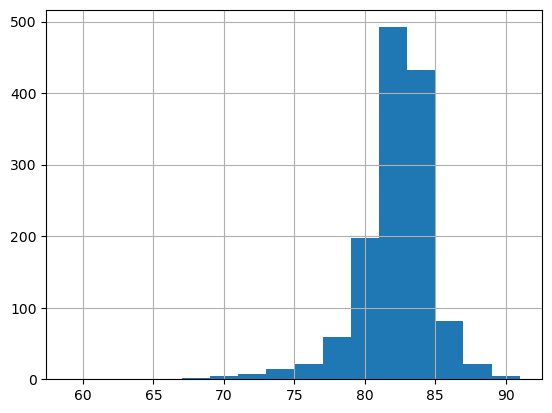

In [44]:
import matplotlib.pyplot as plt

df_coffee["total_cup_points"].hist(bins=np.arange(59,93,2)) # 59'dan başlayıp 93'e kadar olan değerleri her bir adımda 2 artırarak bir dizi 

<Axes: >

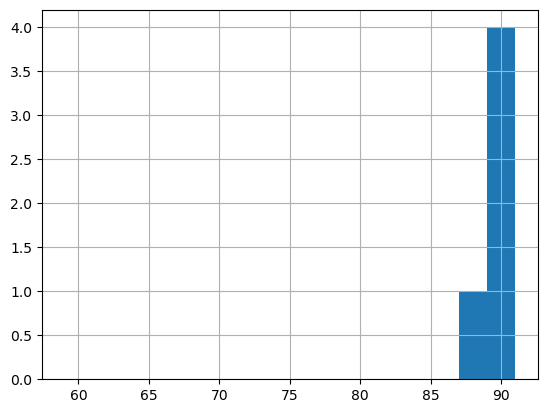

In [46]:
df_coffee.head()["total_cup_points"].hist(bins=np.arange(59,93,2))

<Axes: >

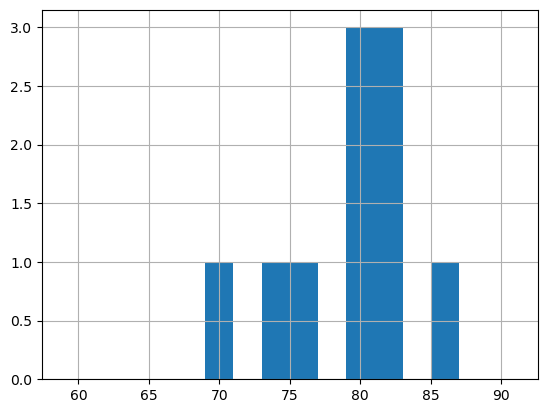

In [48]:
df_coffee.sample(n=10)["total_cup_points"].hist(bins=np.arange(59,93,2))

In [50]:
randoms = np.random.beta(a=2,b=2,size=5000)
randoms
# **`np.random.beta(a=2, b=2, size=5000)`**: Bu fonksiyon, beta dağılımı kullanarak rastgele sayılar üretir. Beta dağılımı, iki pozitif parametre
# olan \(a\) (alfa) ve \(b\) (beta) tarafından şekillendirilen ve [0, 1] aralığında değerler alan bir sürekli dağılımdır.
# `a=2` ve `b=2`: Bu parametreler, dağılımın şeklini belirler. Hem \(a\) hem de \(b\) değerinin 2 olması, simetrik bir dağılım anlamına gelir.
# Bu özel durumda, dağılım [0, 1] aralığında düzgün bir şekilde yüksek sıklıkta orta değerlere yoğunlaşır.
# - `size=5000`: Bu, üretilecek rastgele sayıların sayısını belirtir. Bu durumda, 5000 adet rastgele sayı üretilir.

# Beta dağılımı, özellikle başarı/kazanç oranları gibi oranlar üzerine çalışmalarda sıkça tercih edilen bir dağılımdır, çünkü [0, 1] aralığını
#doğal bir şekilde kullanır ve parametrelerine bağlı olarak çok çeşitli şekiller alabilir.

array([0.4663423 , 0.46606134, 0.16527482, ..., 0.46336641, 0.43330784,
       0.56216631])

In [52]:
df_coffee.sample(n=5, random_state=15452) #aynı değerleri vermesi için her seferinde random state verilir

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
27,86.83,Arabica,kabum trading company,Uganda,chebonet (23) women coffee,None,kabum trading company,0,kabum trading company,1950,...,Green,1.0,"June 26th, 2015",Uganda Coffee Development Authority,188fe373b511e21f614564bf86aa4774270d8e04,b7614767a5343729bbde3a2777c60ce836aed928,m,1950.0,1950.0,1950.0
1043,80.75,Arabica,cadexsa,Honduras,bethel,None,cadexsa,13-63-318,cadexsa,1350,...,Green,2.0,"May 21st, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
544,82.92,Arabica,kawacom uganda ltd,Uganda,sipi organic coffee project,None,kawacom,0,kawacom uganda ltd,1400-1900,...,Green,0.0,"June 27th, 2015",Uganda Coffee Development Authority,188fe373b511e21f614564bf86aa4774270d8e04,b7614767a5343729bbde3a2777c60ce836aed928,m,1400.0,1900.0,1650.0
596,82.75,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KP010914,kona pacific farmers cooperative,None,...,Blue-Green,0.0,"February 5th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
1099,80.25,Arabica,gloria antonieta escobar urrutia,Nicaragua,finca el consuelo,None,"beneficio matagalpa coffee group, s.a.",017/117/018,zeas escobar y compañía limitada,900 m.s.n.m.,...,Green,2.0,"February 20th, 2016",Asociación de Cafés Especiales de Nicaragua,fc561dd3c2eee024b032933e0a97b4aede0dc206,f79a8d4dee92a80ff14025f03ea34fa316b2132f,m,900.0,900.0,900.0


NameError: name 'norm' is not defined